In [44]:
from temporal_networkx import TemporalDiGraph
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sb
import matplotlib.pyplot as plt

In [39]:
sb.set_style('darkgrid')

We just need to call pandas.read_csv, all data processing will be handled within the class

In [2]:
temporal_graph = TemporalDiGraph(pd.read_csv('./soc-sign-bitcoinotc.csv', header=None))

```get_all_months()``` will return all months within the data set

In [3]:
for i, month in enumerate(temporal_graph.get_all_months()):
    print(month)
    if i >= 4: break

2010-11
2010-12
2011-01
2011-02
2011-03


When ```get_df()``` is called without parameters, it will return the whole processed dataframe.

In [4]:
temporal_graph.get_df().sample(5)

,source,target,rating
time,,,
2011-06-10 04:45:39,1005,1014,1
2013-12-21 17:02:20,3804,1334,1
2013-04-25 22:26:14,2642,3682,1
2013-08-15 19:46:10,3793,4666,-10
2014-12-10 03:08:15,1352,1018,1


It will return a dataframe that is sliced by the given month, when a month in the format ```%Y-%m``` is given.

In [5]:
temporal_graph.get_df('2011-03').sample(5)

,source,target,rating
time,,,
2011-03-25 11:40:23,39,149,4
2011-03-30 01:06:18,225,45,1
2011-03-29 02:37:13,1,132,1
2011-03-27 14:18:28,219,176,1
2011-03-02 02:24:32,181,135,1


```get_DiGraph()``` will return a networkx.MultiDiGraph object with all nodes and edges in the dataset.

If a month in the format ```%Y-%m``` is given, it will then return a MultiDiGraph of that month only.

In [6]:
G = temporal_graph.get_DiGraph('2010-11')
G.nodes

NodeView((6, 2, 5, 1, 15, 4, 3, 13, 16, 10, 7, 21, 20, 8, 17, 23, 25, 26, 28, 29, 31, 32, 34, 35, 36, 37))

```draw_network()``` will draw the trust network of the given month.

If it is called without parameters, it will draw the trust network with nodes and edges of all time, which will take up to an hour to complete.

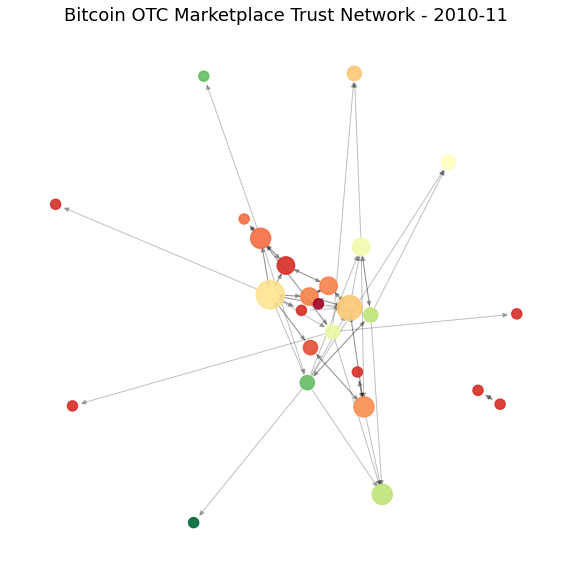

In [7]:
temporal_graph.draw_network('2010-11')

In [9]:
df_degree = pd.DataFrame(nx.algorithms.degree_centrality(G).items(), columns=['Node','Degree']).set_index(['Node'])

In [18]:
df_degree.mean().values[0]

0.1846153846153846

In [24]:
df = pd.DataFrame(pd.Series([month for month in temporal_graph.get_all_months()]), columns=['month'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   month   63 non-null     period[M]
dtypes: period[M](1)
memory usage: 632.0 bytes


In [30]:
df['degree'] = 0

In [36]:
df['degree'] = df.apply(lambda row:
    pd.DataFrame(nx.algorithms.degree_centrality(temporal_graph.get_DiGraph(row['month'].strftime('%Y-%m'))).items(), columns=['Node','Degree']).set_index(['Node']).mean().values[0], axis=1
)

In [41]:
df['month_str'] = df.apply(lambda row: row['month'].strftime('%Y-%m'), axis=1)

In [51]:
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62])

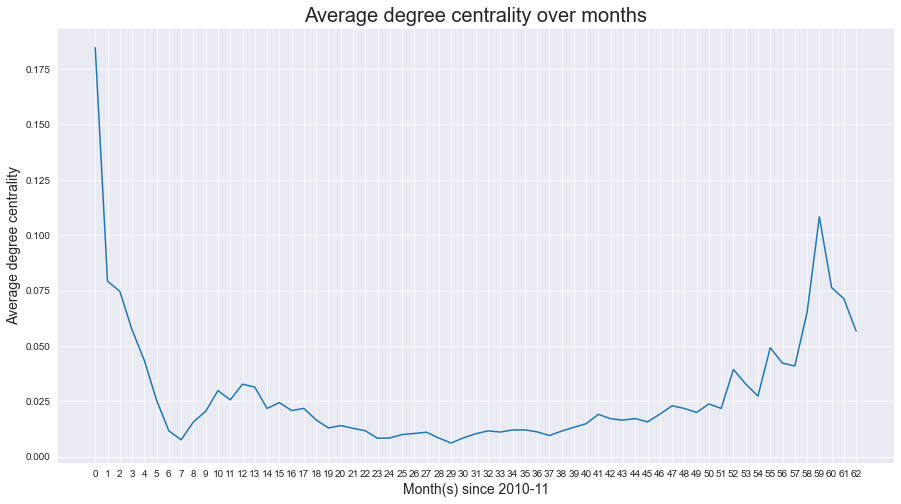

In [63]:
plt.figure(figsize=(15, 8))
fig = sb.lineplot(data=df, x='month_str', y='degree')
fig.set_title('Average degree centrality over months', fontsize=20)
fig.set_xticklabels(df.index.values)
fig.set_xlabel('Month(s) since 2010-11', fontsize=14)
fig.set_ylabel('Average degree centrality', fontsize=14)
plt.show()